## Task 1:  Dependencies


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from dotenv import load_dotenv

load_dotenv(dotenv_path="../.env")

True

In [4]:
import os
import sys
import getpass

# Add the project root to Python path so we can import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.core.core_functions import check_if_env_var_is_set

OPENAI_API_KEY is present
COHERE_API_KEY is present


In [5]:
check_if_env_var_is_set("OPENAI_API_KEY", "OpenAI API key")
check_if_env_var_is_set("COHERE_API_KEY", "Cohere API key")
check_if_env_var_is_set("TAVILY_API_KEY", "TAVILY API key")

OPENAI_API_KEY is present
COHERE_API_KEY is present
TAVILY_API_KEY is present


In [15]:
import importlib

In [16]:
import src.core.core_functions
importlib.reload(src.core.core_functions)

from src.core.core_functions import load_and_prepare_pdf_loan_docs, load_and_prepare_csv_loan_docs, generate_golden_master
from src.agents.build_graph_agent import get_graph_agent

OPENAI_API_KEY is present
COHERE_API_KEY is present


## Task 2: Environment Variables

We'll want to set both our OpenAI API key and our LangSmith environment variables.

In [17]:
from uuid import uuid4

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"AIE7 - Certification Challenge"
check_if_env_var_is_set("LANGCHAIN_API_KEY", "LangSmith API Key")

LANGCHAIN_API_KEY is present


In [22]:
import src.core.core_functions
importlib.reload(src.core.core_functions)

import src.agents.build_graph_agent
importlib.reload(src.agents.build_graph_agent)

import src.agents.llm_tools_for_toolbelt
importlib.reload(src.agents.llm_tools_for_toolbelt)

from src.agents.build_graph_agent import get_graph_agent
from src.agents.llm_tools_for_toolbelt import ask_naive_llm_tool, ask_contextual_compression_llm_tool, ask_multi_query_llm_tool, ask_parent_document_llm_tool

OPENAI_API_KEY is present
COHERE_API_KEY is present
Current working directory: /home/AIE7-Cert-Challenge/notebooks
Loading student loan pdfs (knowledge) data...
Documents count: 269
Current working directory: /home/AIE7-Cert-Challenge/notebooks
Loading student loan complaints data...
Original documents count: 825
Documents count after filtering: 480
Total documents count: 749


In [372]:
naive_graph_agent = get_graph_agent([ask_naive_llm_tool])

In [23]:
import src.evaluation.tool_calls_parser_for_eval
importlib.reload(src.evaluation.tool_calls_parser_for_eval)
from src.evaluation.tool_calls_parser_for_eval import parse_logs, print_formatted_results, extract_contexts_for_eval, parse_langchain_messages

In [415]:
from langchain_core.messages import HumanMessage

# inputs = {"messages" : [HumanMessage(content="Who is the current captain of the Winnipeg Jets?")]}
# inputs = {"messages" : [HumanMessage(content="What concerns does the borrower have regarding Nelnet's communication about their student loan issuer?")]}
inputs = {"messages" : [HumanMessage(content="What is the issue with Aidvantage in the borrower's complaint?")]}

async for chunk in naive_graph_agent.astream(inputs, stream_mode="updates"):
    for node, values in chunk.items():
        print(f"Receiving update from node: '{node}'")
        if node == "action":
          print(f"Tool Used: {values['messages'][0].name}")
          print_formatted_results(parse_logs(str(values["messages"])))
        print("\n")
        print(values["messages"])
        print("\n\n")

Receiving update from node: 'agent'


[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_GhzYtBqDCusdvP9o7OqEBGHe', 'function': {'arguments': '{"question":"What is the issue with Aidvantage in the borrower\'s complaint?"}', 'name': 'ask_naive_llm_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 454, 'total_tokens': 485, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C067hWE2sjgYgN1LAKZO9LcMrF7i2', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee25bb46-2895-40c0-8f8c-811831479b64-0', tool_calls=[{'name': 'ask_naive_llm_tool', 'args': {'question': "What is the issue with Aidvantage in the borrower's compl

In [375]:
# inputs = {"messages" : [HumanMessage(content='')]}
response = naive_graph_agent.invoke(inputs)

evaluation_contexts = extract_contexts_for_eval(response["messages"])
print(f"✅ Extracted {len(evaluation_contexts)} contexts for evaluation")
parsed_data = parse_langchain_messages(response["messages"])
print_formatted_results(parsed_data)

eval_sample = {
    "user_input": inputs["messages"][0].content,
    "response": response["messages"][-1].content,  # Final AI response
    "retrieved_contexts": evaluation_contexts,
    "tools_used": parsed_data['summary']['tools'],
    "num_contexts": len(evaluation_contexts)
}

print(f"\n🎯 EVALUATION SAMPLE:")
print(f"Query: {eval_sample['user_input']}")
print(f"Response: {eval_sample['response'][:200]}...")
print(f"Contexts: {eval_sample['num_contexts']} extracted")
print(f"Tools: {eval_sample['tools_used']}")

✅ Extracted 5 contexts for evaluation
=== PARSING RESULTS ===
Tool calls: 1
Tool results: 3
Tools used: [None, 'StudentAid_Federal_Search']

=== TOOL CALLS ===
1. StudentAid_Federal_Search -> {'__arg1': 'Aidvantage borrower complaint'}

=== TOOL RESULTS ===
1. None -> What is the issue with Aidvantage in the borrower's complaint?...
2. StudentAid_Federal_Search -> StudentAid.gov Search Results for: Aidvantage borrower complaint  Summary: Aidvantage handles federa...
3. None -> The issue with Aidvantage in the borrower's complaint is not explicitly detailed in the search resul...

=== CONTEXT EXTRACTION DEMO ===
Extracted 5 contexts for evaluation:
1. StudentAid.gov Search Results for: Aidvantage borrower complaint...
2. Summary: Aidvantage handles federal student loan servicing; borrowers can submit complaints via the Help Center. Aidvantage is a private company manag...
3. Official Federal Information:
1. Aidvantage
   Aidvantage is an official student loan servicer of Federal Student

### Generate Golden master

In [377]:
%%time
student_loan_pdf_docs_dataset = load_and_prepare_pdf_loan_docs()
student_loan_complaint_docs_dataset  = load_and_prepare_csv_loan_docs()
student_loan_docs_dataset = student_loan_pdf_docs_dataset + student_loan_complaint_docs_dataset

Loading student loan pdfs (knowledge) data...
Documents count: 269
Loading student loan complaints data...
Original documents count: 825
Documents count after filtering: 480
CPU times: user 3.74 s, sys: 0 ns, total: 3.74 s
Wall time: 3.7 s


In [378]:
%%time
golden_master_dataset = generate_golden_master(student_loan_docs_dataset)

CPU times: user 283 ms, sys: 0 ns, total: 283 ms
Wall time: 286 ms


In [379]:
golden_master_dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,how title iv work with all these different cal...,"[non-term (includes clock-hour calendars), or ...","Whether an academic calendar is standard term,...",single_hop_specifc_query_synthesizer
1,"According to Volume 8, Chapter 3, what are the...",[Inclusion of Clinical Work in a Standard Term...,"Volume 8, Chapter 3 provides additional guidan...",single_hop_specifc_query_synthesizer
2,wHat is tItle IV?,[Non-Term Characteristics A program that measu...,Title IV programs require disbursements (excep...,single_hop_specifc_query_synthesizer
3,"when student get TEACH Grant, do it matter if ...",[both the credit or clock hours and the weeks ...,if student finish more weeks or hours in a pay...,single_hop_specifc_query_synthesizer
4,How does the disbursement timing for federal s...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
5,How does the requirement of a practicum or cli...,[<1-hop>\n\nInclusion of Clinical Work in a St...,If a practicum or clinical experience is requi...,multi_hop_abstract_query_synthesizer
6,how does a subscription-based academic calenda...,[<1-hop>\n\nnon-term (includes clock-hour cale...,"in a subscription-based academic calendar, whi...",multi_hop_abstract_query_synthesizer
7,if a program got practicum or clinical experie...,[<1-hop>\n\nInclusion of Clinical Work in a St...,if the practicum or clinical experience is req...,multi_hop_abstract_query_synthesizer
8,"Acccording to the guidelinnes in Volume 2, Cha...",[<1-hop>\n\nDisbursement Timing in Subscriptio...,The structurre of a subscription-based academi...,multi_hop_specific_query_synthesizer
9,how direct loan work if student in non-term or...,[<1-hop>\n\nnon-term (includes clock-hour cale...,if student in non-term or subscription-based p...,multi_hop_specific_query_synthesizer


In [10]:
from tqdm.notebook import tqdm

import src.evaluation.evaluation_helpers
importlib.reload(src.evaluation.evaluation_helpers)
from src.evaluation.evaluation_helpers import generate_responses_for_golden_dataset, run_ragas_evaluation, record_metrics_from_run

### Synthetic Data Generation using RAGAS using the Golden master (Naive Retriever)

In [382]:
%%time
golden_master_dataset = generate_responses_for_golden_dataset(golden_master_dataset, naive_graph_agent)

  0%|          | 0/12 [00:00<?, ?it/s]

CPU times: user 5.26 s, sys: 172 ms, total: 5.43 s
Wall time: 1min 49s


In [ ]:
golden_master_dataset.to_pandas().to_csv('../golden-masters/naive_golden_master_dataset.csv', index=False)
golden_master_dataset.to_pandas()

In [385]:
naive_result = run_ragas_evaluation(golden_master_dataset, "Naive")

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

CPU times: user 8.82 s, sys: 1.42 s, total: 10.2 s
Wall time: 5min 59s


In [388]:
import pandas as pd
naive_raw_stats_df = pd.DataFrame([extract_ragas_metrics(result, 'gpt-4.1-mini')])
record_metrics_from_run('Naive', naive_raw_stats_df)

In [432]:
columns=['context_recall', 'faithfulness', 'factual_correctness', 'answer_relevancy', 'context_entity_recall', 'noise_sensitivity_relevant']
naive_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,noise_sensitivity_relevant
0,0.761111,0.879708,0.550833,0.873306,0.344629,0.264588


### Synthetic Data Generation using RAGAS using the Golden master (Contextual Compression Retriever)

In [389]:
contextual_compression_graph_agent = get_graph_agent([ask_contextual_compression_llm_tool])

In [390]:
import copy
import time
cc_golden_master_dataset = copy.deepcopy(golden_master_dataset)
cc_golden_master_dataset = generate_responses_for_golden_dataset(cc_golden_master_dataset, contextual_compression_graph_agent, pause_secs_between_each_run=2)

In [ ]:
cc_golden_master_dataset.to_pandas().to_csv('../golden-masters/cc_golden_master_dataset.csv', index=False)
cc_golden_master_dataset.to_pandas()

In [394]:
%%time
cc_result = run_ragas_evaluation(cc_golden_master_dataset, "Contextual Compression")

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

CPU times: user 7.69 s, sys: 1.14 s, total: 8.82 s
Wall time: 4min 24s


In [395]:
cc_raw_stats_df = pd.DataFrame([extract_ragas_metrics(cc_result, 'gpt-4.1-mini')])
record_metrics_from_run('Contextual Compression', cc_raw_stats_df)

In [433]:
cc_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,noise_sensitivity_relevant
0,0.473413,0.715502,0.4125,0.618577,0.285522,0.234447


### Synthetic Data Generation using RAGAS using the Golden master (Multi Query Retriver)

In [396]:
multi_query_graph_agent = get_graph_agent([ask_multi_query_llm_tool])

In [397]:
import copy
import time
mq_golden_master_dataset = copy.deepcopy(golden_master_dataset)
mq_golden_master_dataset = generate_responses_for_golden_dataset(mq_golden_master_dataset, multi_query_graph_agent)

In [ ]:
mq_golden_master_dataset.to_pandas().to_csv('../golden-masters/mq_golden_master_dataset.csv', index=False)
mq_golden_master_dataset.to_pandas()

In [401]:
%%time
mq_result = run_ragas_evaluation(mq_evaluation_dataset, "Multi Query")

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

Exception raised in Job[5]: TimeoutError()
Exception raised in Job[41]: TimeoutError()
Exception raised in Job[53]: TimeoutError()
Exception raised in Job[65]: TimeoutError()


CPU times: user 11.5 s, sys: 1.7 s, total: 13.2 s
Wall time: 7min 21s


In [402]:
mq_raw_stats_df = pd.DataFrame([extract_ragas_metrics(mq_result, 'gpt-4.1-mini')])
record_metrics_from_run('MultiQuery', mq_raw_stats_df)

In [434]:
mq_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,noise_sensitivity_relevant
0,0.479365,0.77706,0.368333,0.70352,0.2983,0.135519


In [403]:
parent_document_graph_agent = get_graph_agent([ask_parent_document_llm_tool])

In [404]:
%%time
pd_golden_master_dataset = copy.deepcopy(golden_master_dataset)
pd_golden_master_dataset = generate_responses_for_golden_dataset(pd_golden_master_dataset, parent_document_graph_agent)

  0%|          | 0/12 [00:00<?, ?it/s]

CPU times: user 4.05 s, sys: 275 ms, total: 4.32 s
Wall time: 1min 58s


In [ ]:
pd_golden_master_dataset.to_pandas().to_csv('../golden-masters/pd_golden_master_dataset.csv', index=False)
pd_golden_master_dataset.to_pandas()

In [406]:
%%time
pq_result = run_ragas_evaluation(pd_golden_master_dataset, "Parent Document")

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

CPU times: user 8.54 s, sys: 1.22 s, total: 9.76 s
Wall time: 5min 9s


In [407]:
pd_raw_stats_df = pd.DataFrame([extract_ragas_metrics(pd_result, 'gpt-4.1-mini')])
record_metrics_from_run('Parent Document', pd_raw_stats_df)

In [435]:
pd_raw_stats_df[columns]

,context_recall,faithfulness,factual_correctness,answer_relevancy,context_entity_recall,noise_sensitivity_relevant
0,0.597222,0.748783,0.410833,0.621243,0.396675,0.209318


In [ ]:
collected_df = pd.read_csv('../metrics/ragas-evaluation-metrics.csv')
collected_df.tail()

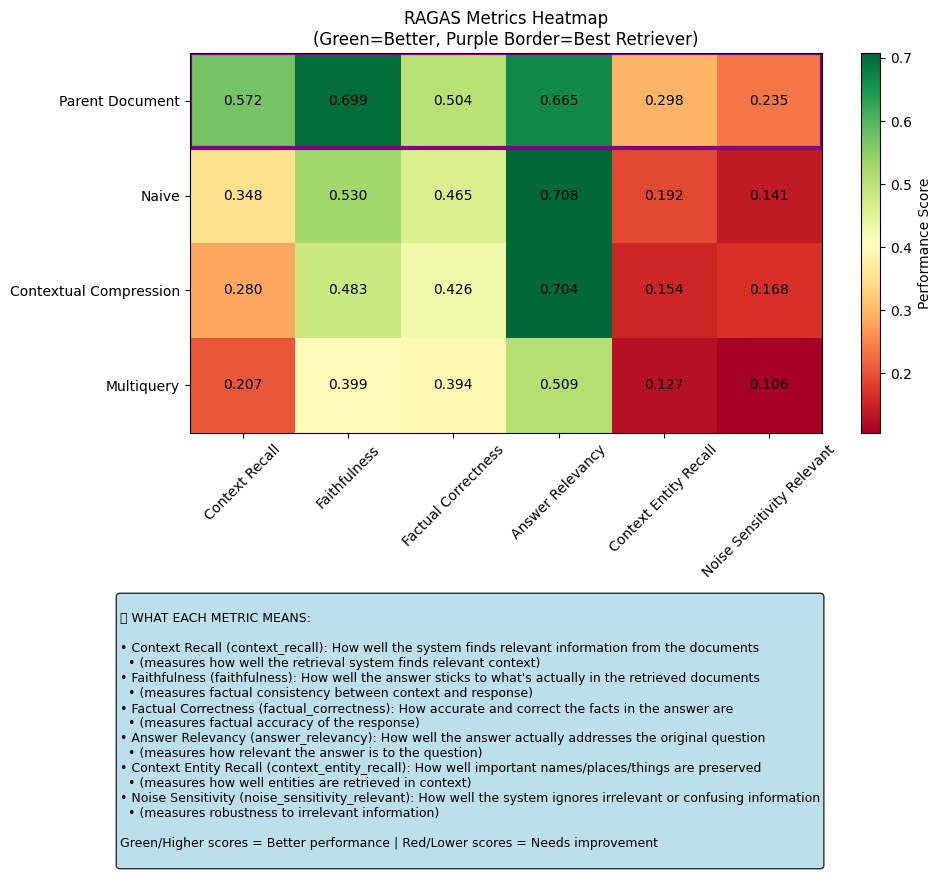

<module 'src.visualization.visualize_retriever_performance' from '/home/AIE7-Cert-Challenge/src/visualization/visualize_retriever_performance.py'>

In [8]:
import importlib
import src.visualization.visualize_retriever_performance
importlib.reload(src.visualization.visualize_retriever_performance)